# InternetFirewallSupervisedLearning
## Author: Tijs van Lieshout

Predicting the Internet Firewall action based on log info. Supervised Learning Assignment for Master DSLS.

### Data availability:
- [Direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/00542/log2.csv)
- [Archive link with some info](https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data)
- [F. Ertam and M. Kaya, "Classification of firewall log files with multiclass support vector machine," 2018 6th International Symposium on Digital Forensic and Security (ISDFS), 2018, pp. 1-4, doi: 10.1109/ISDFS.2018.8355382.](https://doi.org/10.1109/ISDFS.2018.8355382)

Table 1. Features and Description. Adapted from Ertam & Kaya, 2018.

|        Feature       |                  Description                 |
|:--------------------:|:--------------------------------------------:|
| Source Port          | Client Source Port                           |
| Destination Port     | Client Destination Port                      |
| NAT Source Port      | Network Address Translation Source Port      |
| NAT Destination Port | Network Address Translation Destination Port |
| Elapsed Time (sec)   | Elapsed Time for flow                        |
| Bytes                | Total Bytes                                  |
| Bytes Sent           | Bytes Sent                                   |
| Bytes Received       | Bytes Received                               |
| Packets              | Total Packets                                |
| pkts_sent            | Packets Sent                                 |
| pkts_received        | Packets Received                             |
| Action               | Class (allow, deny, drop, reset-both)        |

Table 2. Classes to predict (Actions). Adapted from Ertam & Kaya, 2018.

|   Action   |                                                               Description                                                              |
|:----------:|:--------------------------------------------------------------------------------------------------------------------------------------:|
| Allow      | Allows the internet traffic.                                                                                                           |
| Deny       | Blocks traffic and enforces the default Deny Action defined for the application that is being denied.                                  |
| Drop       | Silently drops the traffic; for an application, it overrides the default deny action. A TCP reset is not sent to the host/application. |
| Reset-Both | Sends a TCP reset to both the client-side and server-sidedevices.                                                                      |



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("log2.csv")
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [4]:
allow, deny, drop, reset_both = df['Action'].value_counts()
print('Number of allowed logs: ', allow)  
print('Number of denied logs: ', deny)
print('Number of dropped logs: ', drop)  
print('Number of reset-both logs: ', reset_both) 

print('\n')
print('% of allowed logs', round(allow / len(df) * 100, 1), '%')
print('% of denied logs', round(deny / len(df) * 100, 1), '%')
print('% of dropped logs', round(drop / len(df) * 100, 1), '%')
print('% of reset-both logs', round(reset_both / len(df) * 100, 1), '%')

Number of allowed logs:  37640
Number of denied logs:  14987
Number of dropped logs:  12851
Number of reset-both logs:  54


% of allowed logs 57.4 %
% of denied logs 22.9 %
% of dropped logs 19.6 %
% of reset-both logs 0.1 %


<AxesSubplot:>

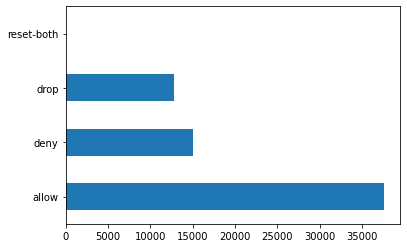

In [5]:
df['Action'].value_counts().plot(kind='barh')

Pretty unbalanced classes to predict unfortunately. Might run in some problems with the reset-both class later on. SMOTE could be used, but in this case I won't attempt it (out of the scope of this assignment).

In [6]:
# missing data
df.isnull().sum() 
# no missing data, no imputation needed

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [7]:
description = df.groupby(['Action']).describe()

<AxesSubplot:>

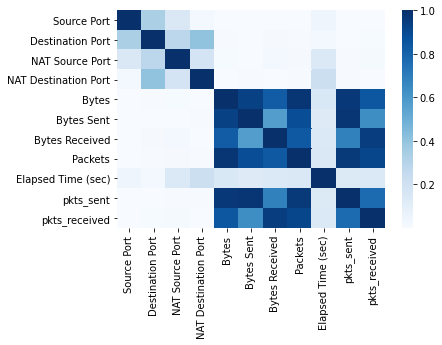

In [8]:
c = df.corr().abs()
sns.heatmap(c, cmap=sns.color_palette("Blues", as_cmap=True))

'Bytes Sent', 'Bytes Received', 'pkts_sent' and 'pkts_received' can be discarded as Bytes and Packets are the total of the two pairs respectively.

I am also going to discard packets for bytes as it is highly correlated. I'll keep Bytes since it is more detailed than packets (1 packet consists of multiple bytes)

All of the port variables should not be seen as continous, but probably are interesting to see the range

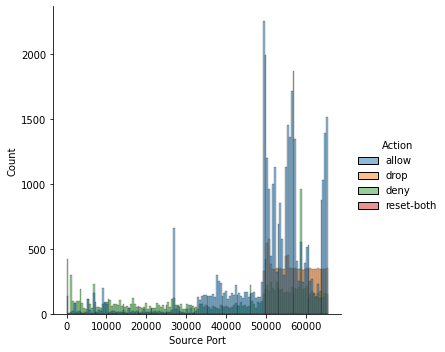

In [9]:
sns.displot(df, x="Source Port", hue="Action")
plt.show()

In [10]:
description['Source Port']

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,51127.933103,12215.084883,0.0,49418.0,53759.0,57369.25,65534.0
deny,14987.0,38557.289317,21098.611314,0.0,18754.0,46573.0,57355.50,65529.0
drop,12851.0,57038.209244,4788.365511,49156.0,52797.0,56846.0,61195.00,65533.0
reset-both,54.0,26722.425926,18382.095784,1024.0,11573.5,22207.5,40013.50,64461.0


All Actions of drop seem to happen in high source ports (minimum 49156). Reset-both Source Port minimum is 1024

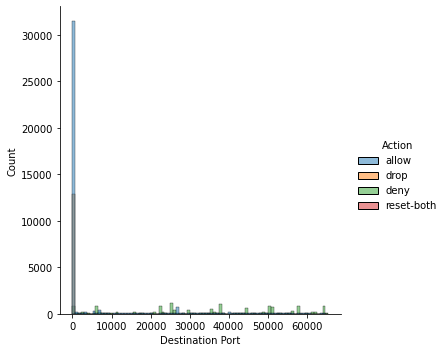

In [11]:
sns.displot(df, x="Destination Port", hue="Action")
plt.show()

In [12]:
description['Destination Port']

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,4728.336265,12573.742340,0.0,53.0,80.0,443.0,65535.0
deny,14987.0,33904.072129,19337.312430,0.0,22114.0,35440.0,50584.0,65504.0
drop,12851.0,445.000000,0.000000,445.0,445.0,445.0,445.0,445.0
reset-both,54.0,24882.333333,18531.926996,1.0,5618.0,25773.0,34021.0,61248.0


Most actions seem to have a very low destination port. All drop actions are done on Destination Port 445

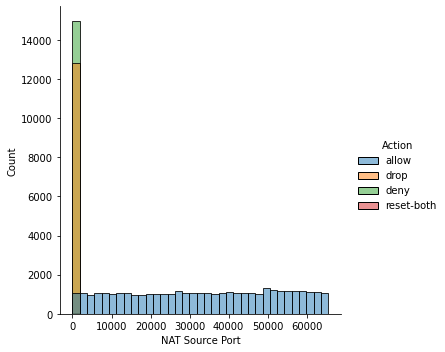

In [13]:
sns.displot(df, x="NAT Source Port", hue="Action")
plt.show()

In [14]:
description['NAT Source Port']

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,33549.797689,19004.048999,0.0,17050.25,33999.5,50341.25,65535.0
deny,14987.0,31.828184,1269.390081,0.0,0.00,0.0,0.00,62347.0
drop,12851.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
reset-both,54.0,6673.648148,15236.959303,0.0,0.00,0.0,0.00,64014.0


Allowed actions seme to be uniformly distributed over NAT Source Ports. All dropped NAT Source Ports are equal to 0. Most deny and reset-both actions have NAT Source Ports of 0.

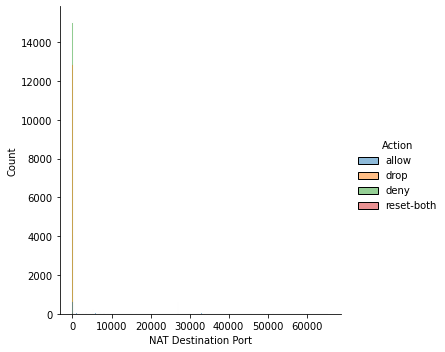

In [15]:
sns.displot(df, x="NAT Destination Port", hue="Action")
plt.show()

In [16]:
description['NAT Destination Port']

,count,mean,std,min,25%,50%,75%,max
Action,,,,,,,,
allow,37640.0,4648.409724,12487.696166,0.0,53.0,80.0,443.0,65535.0
deny,14987.0,2.164142,132.690631,0.0,0.0,0.0,0.0,8889.0
drop,12851.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
reset-both,54.0,753.111111,1422.171667,0.0,0.0,0.0,0.0,3389.0


Allowed actions seem to be distributed over all NAT Destination Ports, but mostly under 443. All dropped NAT Destination Ports are equal to 0. Most deny and reset-both actions have NAT Destination Ports of 0.

In [17]:
cols = ['Source Port', 
        'Destination Port', 
        'NAT Source Port', 
        'NAT Destination Port', 
        'Bytes', 
        'Elapsed Time (sec)']
df_features = df[cols].rename(columns={'Source Port':'source_port',
                                       'Destination Port':'destination_port', 
                                       'NAT Source Port':'nat_source_port', 
                                       'NAT Destination Port':'nat_destination_port',
                                       'Bytes':'bytes',
                                       'Elapsed Time (sec)':'elapsed_time'})

<AxesSubplot:>

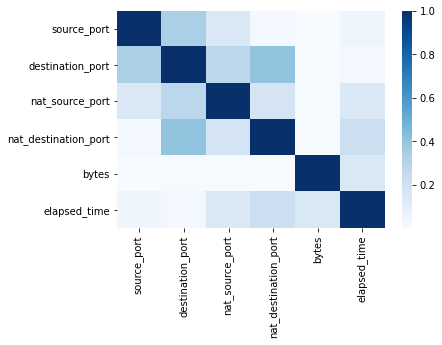

In [18]:
c = df_features.corr().abs()
sns.heatmap(c, cmap=sns.color_palette("Blues", as_cmap=True))

In [19]:
y = np.array(df['Action'].replace({'allow':0,'deny':1,'drop':2, 'reset-both':3}))
X = np.array(df_features)
print(y.shape)
print(X.shape)

(65532,)
(65532, 6)


Let's normalize because the variance differs greatly per feature.

In [20]:
from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

In [21]:
from sklearn.model_selection import train_test_split, ShuffleSplit

#split
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

#cross validation
cv = ShuffleSplit(n_splits=100, test_size=test_size, random_state=42)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def evaluate(y_test, y_pred, X_test):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [23]:
# Based on code from https://github.com/fenna/student_BFVM19DATASC3
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X_train, y_train, X_val, y_val, training_sizes=range(999, len(X_train), 1000)):
    MSE_train, MSE_val = calculate_MSE_over_training_sizes(model, X_train, y_train, 
                                                           X_val, y_val, training_sizes)

    plt.plot(training_sizes, MSE_train,
             "r-o", linewidth=2, label="trainingsdata")
    plt.plot(training_sizes, MSE_val, 
             "b-*", linewidth=3, label="validationdata")
    plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 

    
def calculate_MSE_over_training_sizes(model, X_train, y_train, X_val, y_val, training_sizes):
    train_errors, val_errors = [], []
    for m in training_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    return np.sqrt(train_errors), np.sqrt(val_errors)

## Most basic model; A dummy classifier

In [24]:
from sklearn.dummy import DummyClassifier

In [25]:
dm = DummyClassifier(strategy='stratified') 
# stratified generates predictions by respecting the training set’s class distribution.
dm.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [26]:
y_pred = dm.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[8690 3350 2951    8]
 [3471 1383 1206    6]
 [3007 1133  979    1]
 [  19    5    4    0]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.58     14999
           1       0.24      0.23      0.23      6066
           2       0.19      0.19      0.19      5120
           3       0.00      0.00      0.00        28

    accuracy                           0.42     26213
   macro avg       0.25      0.25      0.25     26213
weighted avg       0.42      0.42      0.42     26213



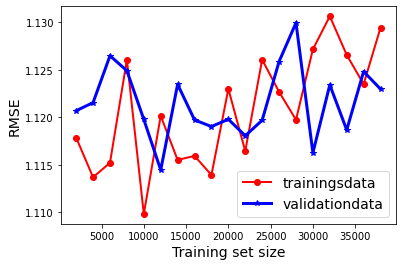

In [27]:
plot_learning_curves(dm, X_train, y_train, X_test, y_test, range(1999, len(X_train), 2000))

Based on this learning curve you can not say if the model is underfitted or overfitted as it actually doesn't learn over iterations since it is a dummy classifier.

Let's move on from this dummy model and attempt a basic classifier; Logistic regression.

## Logistic Regression

In [28]:
# train
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=1000, n_jobs=-1) # n_jobs=-1 to use all processors because of large dataset
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [29]:
# evaluation
y_pred = lg.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[14888    44    67     0]
 [    6  5826   234     0]
 [    0     0  5120     0]
 [    6    22     0     0]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14999
           1       0.99      0.96      0.97      6066
           2       0.94      1.00      0.97      5120
           3       0.00      0.00      0.00        28

    accuracy                           0.99     26213
   macro avg       0.73      0.74      0.74     26213
weighted avg       0.99      0.99      0.99     26213



/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

This warning basically means that there are not enough instances of the fourth class to have in both the training and test set, so it cannot evaluate it's prediction.

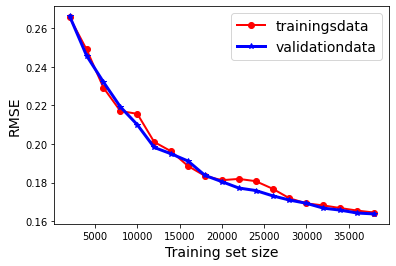

In [30]:
plot_learning_curves(lg, X_train, y_train, X_test, y_test, range(1999, len(X_train), 2000))

Based on this learning curve I would say this model is maybe a tiny bit overfitted but overall fitted well, as the validation data and training data error are close together.

As the fourth class could not be evaluated, let's make a decision tree which will at least attempt it albeit the low support.

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[14993     6     0     0]
 [    0  6041    17     8]
 [    0    19  5101     0]
 [    2    20     0     6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14999
           1       0.99      1.00      0.99      6066
           2       1.00      1.00      1.00      5120
           3       0.43      0.21      0.29        28

    accuracy                           1.00     26213
   macro avg       0.85      0.80      0.82     26213
weighted avg       1.00      1.00      1.00     26213



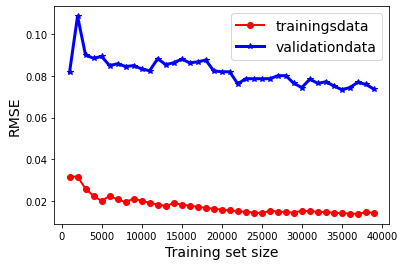

In [33]:
plot_learning_curves(dt, X_train, y_train, X_test, y_test)

Based on this learning curve I would say this model is underfitted as there is still a large gap between training error and validation error. Although mait looks like more data would not fix this problem.

Let's now get to the real deal, comparing SVM methods to Ertam & Kaya, 2018.

## SVM 

### Activation function: linear

In [34]:
from sklearn.svm import SVC
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
y_pred = svm_lin.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[14960    34     5     0]
 [    6  5842   218     0]
 [    0     0  5120     0]
 [    6    22     0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14999
           1       0.99      0.96      0.98      6066
           2       0.96      1.00      0.98      5120
           3       0.00      0.00      0.00        28

    accuracy                           0.99     26213
   macro avg       0.74      0.74      0.74     26213
weighted avg       0.99      0.99      0.99     26213



/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

This warning basically means that there are not enough instances of the fourth class to have in both the training and test set, so it cannot evaluate it's prediction.

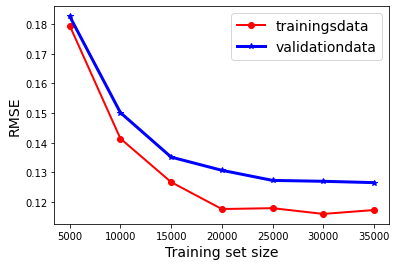

In [36]:
plot_learning_curves(svm_lin, X_train, y_train, X_test, y_test, range(4999, len(X_train), 5000))

Based on this learning curve I would say this model is roughly fitted good. No large gap in error between training and validation data.

### Activation function: poly

In [37]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [38]:
y_pred = svm_poly.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[14673    65   260     1]
 [    6  5794   266     0]
 [    0     0  5120     0]
 [    6    22     0     0]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14999
           1       0.99      0.96      0.97      6066
           2       0.91      1.00      0.95      5120
           3       0.00      0.00      0.00        28

    accuracy                           0.98     26213
   macro avg       0.72      0.73      0.73     26213
weighted avg       0.98      0.98      0.98     26213



This warning basically means that there are not enough instances of the fourth class to have in both the training and test set, so it cannot evaluate it's prediction.

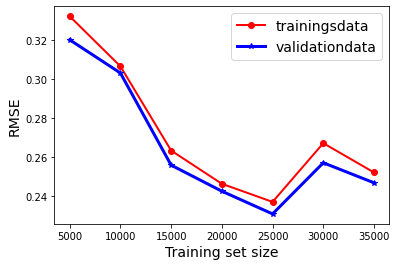

In [39]:
plot_learning_curves(svm_poly, X_train, y_train, X_test, y_test, range(4999, len(X_train), 5000))

Based on this learning curve I would say this model is overfitted as the error increases again after 25000 instances.

### Activation function: RBF

In [40]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [41]:
y_pred = svm_rbf.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[14941    53     5     0]
 [    6  5849   211     0]
 [    0     0  5120     0]
 [    6    22     0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14999
           1       0.99      0.96      0.98      6066
           2       0.96      1.00      0.98      5120
           3       0.00      0.00      0.00        28

    accuracy                           0.99     26213
   macro avg       0.74      0.74      0.74     26213
weighted avg       0.99      0.99      0.99     26213



/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

This warning basically means that there are not enough instances of the fourth class to have in both the training and test set, so it cannot evaluate it's prediction.

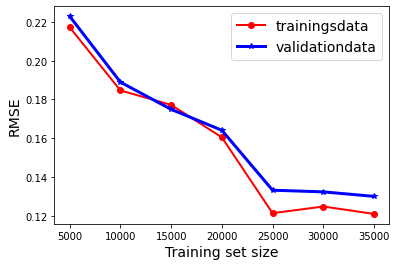

In [42]:
plot_learning_curves(svm_rbf, X_train, y_train, X_test, y_test, range(4999, len(X_train), 5000))

Based on this learning curve I would say this model is roughly fitted good. No large gap in error between training and validation data.

### Activation function: sigmoid

In [43]:
from sklearn.svm import SVC
svm_sig = SVC(kernel='sigmoid')
svm_sig.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [44]:
y_pred = svm_sig.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[13972   321   706     0]
 [  519  5016   531     0]
 [  837     0  4283     0]
 [    8    20     0     0]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14999
           1       0.94      0.83      0.88      6066
           2       0.78      0.84      0.81      5120
           3       0.00      0.00      0.00        28

    accuracy                           0.89     26213
   macro avg       0.66      0.65      0.65     26213
weighted avg       0.89      0.89      0.89     26213



/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

This warning basically means that there are not enough instances of the fourth class to have in both the training and test set, so it cannot evaluate it's prediction.

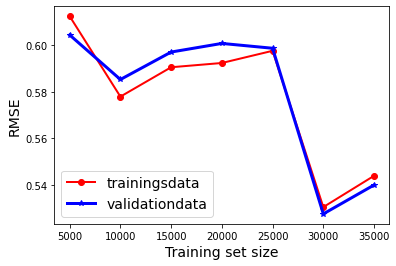

In [45]:
plot_learning_curves(svm_sig, X_train, y_train, X_test, y_test, range(4999, len(X_train), 5000))

Based on this learning curve I would say this model is overfitted (kind of a weird learning curve actually), stopping at 30000 instances would be advised.

## Ensemble learning (Voting Classifier)

In [46]:
from sklearn.ensemble import VotingClassifier
estimators = [('svm_lin', svm_lin), ('svm_poly', svm_poly), ('svm_rbf', svm_rbf)]
vclf = VotingClassifier(estimators=estimators, n_jobs=-1)  # n_jobs=-1 to use all processors because of large dataset
vclf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm_lin', SVC(kernel='linear')),
                             ('svm_poly', SVC(kernel='poly')),
                             ('svm_rbf', SVC())],
                 n_jobs=-1)

In [47]:
y_pred = vclf.predict(X_test)
evaluate(y_test, y_pred, X_test)

[[14950    44     5     0]
 [    6  5836   224     0]
 [    0     0  5120     0]
 [    6    22     0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14999
           1       0.99      0.96      0.98      6066
           2       0.96      1.00      0.98      5120
           3       0.00      0.00      0.00        28

    accuracy                           0.99     26213
   macro avg       0.74      0.74      0.74     26213
weighted avg       0.99      0.99      0.99     26213



/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tijs/virtualenvs/programming1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

This warning basically means that there are not enough instances of the fourth class to have in both the training and test set, so it cannot evaluate it's prediction.

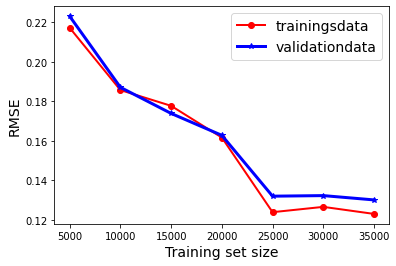

In [48]:
plot_learning_curves(vclf, X_train, y_train, X_test, y_test, range(4999, len(X_train), 5000))

Based on this learning curve I would say this model is roughly fitted good. No large gap in error between training and validation data.

## Conclusion

Table 3: Comparison of SVM performance between Ertam & Kaya, 2018 and my own implementation.

\* = Better performing model

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#93a1a1;border-spacing:0;}
.tg td{background-color:#fdf6e3;border-color:#93a1a1;border-style:solid;border-width:1px;color:#002b36;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#657b83;border-color:#93a1a1;border-style:solid;border-width:1px;color:#fdf6e3;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-uzvj{border-color:inherit;font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-uzvj" rowspan="2">Method</th>
    <th class="tg-7btt" colspan="2">F1</th>
    <th class="tg-7btt" colspan="2">Precision</th>
    <th class="tg-7btt" colspan="2">Recall</th>
  </tr>
  <tr>
    <td class="tg-7btt">Ertam &amp; Kaya</td>
    <td class="tg-7btt">van Lieshout</td>
    <td class="tg-7btt">Ertam &amp; Kaya</td>
    <td class="tg-7btt">van Lieshout</td>
    <td class="tg-7btt">Ertam &amp; Kaya</td>
    <td class="tg-7btt">van Lieshout</td>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">SVM Linear</td>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">0.99*</td>
    <td class="tg-0pky">0.68</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">0.85</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
  </tr>
  <tr>
    <td class="tg-0pky">SVM Polynomial</td>
    <td class="tg-0pky">0.53</td>
    <td class="tg-0pky">0.98<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">0.62</td>
    <td class="tg-0pky">0.98<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">0.47</td>
    <td class="tg-0pky">0.98<span style="font-weight:400;font-style:normal">*</span></td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">SVM RBF</span></td>
    <td class="tg-0pky">0.76</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">0.63</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">0.97</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">SVM Sigmoid</span></td>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">0.89<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">0.60</td>
    <td class="tg-0pky">0.89<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">0.99*</td>
    <td class="tg-0pky">0.89</td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="font-weight:400;font-style:normal">SVM VotingClassifier</span></td>
    <td class="tg-0pky">NA</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">NA</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
    <td class="tg-0pky">NA</td>
    <td class="tg-0pky">0.99<span style="font-weight:400;font-style:normal">*</span></td>
  </tr>
</tbody>
</table>

Except for the recall of the SVM Sigmoid I have improved all other metrics for all other activation types of multi-class Support Vector Machines.

In the end this SVM VotingClassifier seems very good, but still suffers from low support for the 'reset-both' class, adding a decision tree won't help with this Voting classifier as it will always be in the minority compared to the three SVMs. SMOTE could be used as future work to also train on the 'reset-both' class.